**Unsupervised Machine Learning usinf Kmeans Clustering Algorithm**
From the given ‘Iris’ dataset, predicted the optimum number of clusters and represented it visually.


In [1]:
#Import all required libraries for easy to understand
import pandas as pd
import numpy as np
#import the python libraries matplotlib and seaborn libraries is used for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#reading the dataset in csv file into dataframed named "Iris"
Iris = pd.read_csv("Iris.csv")

In [3]:
#Found out the view of dataset by head() functon whose defaul is set to 5 rows
Iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**Exploratory Data Analysis**

In [4]:
#dimesion of the dataset
Iris.shape

(150, 6)

In [5]:
#Extract summary of the dataset
Iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [6]:
#Checking number of nulls per column
Iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

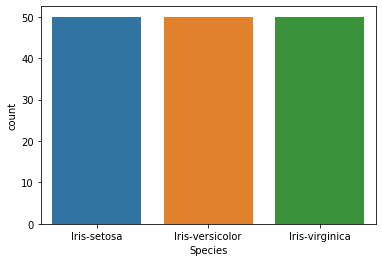

In [7]:
#countplot for column species
sns.countplot(Iris.Species)

In [8]:
X = Iris.iloc[:, [1,2,3,4]].values

## Intuitive working:
1. Select K random points
2. Calculate centroid for all the points and assign points to closest centroid
3. Repeat till converge

## Random initialization problem
1. Random initialiaztion doesn't always work
2. To solve this problem use KMeans++

## Selecting number of clusters (Elbow method)
Within Cluster Sum of Squares is the sum of squares of the distance of every point to the nearest cluster. Initially it will be very high and then it will lower and lower and will eventually reach 0. We have to make a call and decide what is the best value of K depending on the slope obtained on increasing the cluster. If at a point, increase in number of cluster doesn't decrease a substantial amount of WCSS then that's the ideal number of clusters. 

__In short: We're maximizing the second derivative of WCSS__

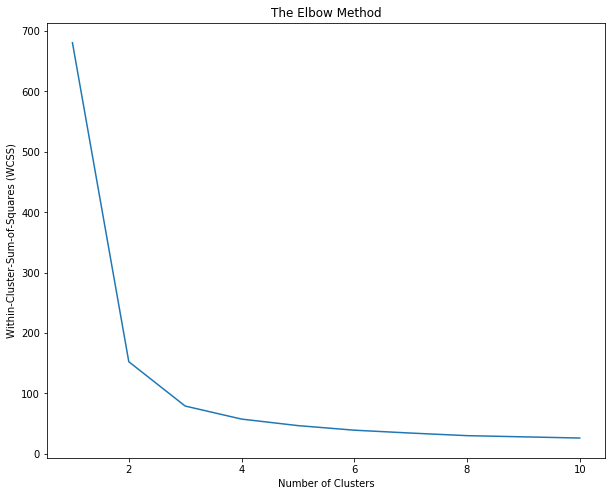

In [9]:
from sklearn.cluster import KMeans

fig = plt.figure(figsize=(10, 8))
WCSS = []
for i in range(1, 11):
    clf = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    clf.fit(X)
    WCSS.append(clf.inertia_) # inertia is another name for WCSS

plt.plot(range(1, 11), WCSS)
plt.title('The Elbow Method')
plt.ylabel('Within-Cluster-Sum-of-Squares (WCSS)')
plt.xlabel('Number of Clusters')
plt.show()

In [17]:
#picking the value from the elbow point
clf = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10,  random_state=0)
y_kmeans = clf.fit_predict(X)

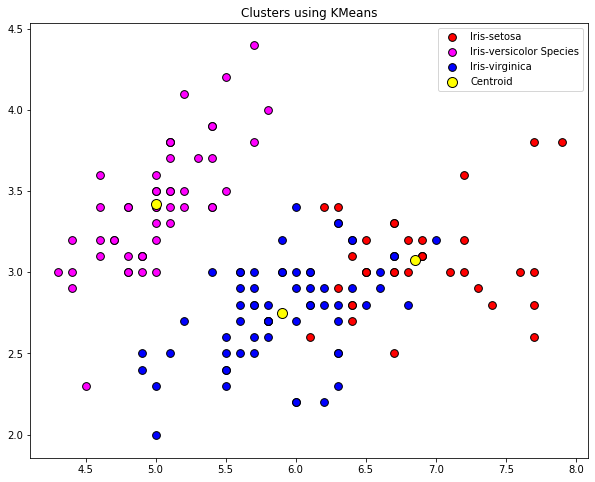

In [18]:
fig = plt.figure(figsize=(10, 8))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color='red', s=60, label='Iris-setosa', edgecolors='black')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color='magenta', s=60, label='Iris-versicolor Species', edgecolors='black')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color='blue',s=60, label='Iris-virginica', edgecolors='black')

# cluster centres
plt.scatter(clf.cluster_centers_[:, 0], clf.cluster_centers_[:, 1], color='yellow', s=100, label='Centroid',edgecolors='black')
plt.legend()
plt.title('Clusters using KMeans')

plt.show()